<AxesSubplot:xlabel='Date'>

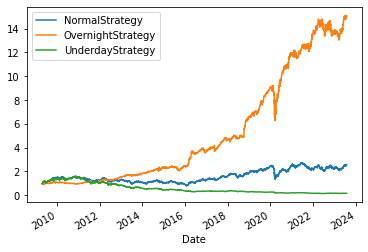

In [1]:
### Retorno ibovespa



import pandas as pd
import yfinance as yf
import requests

# Defina o intervalo de datas para o histórico desejado

# Obtenha os dados do índice IBOVESPA

df = yf.Ticker("BOVA11.SA").history(start="2000-01-01")
df['Close_yesterday'] = df['Close'].shift(1)
df['OvernightStrategy'] =  df['Open'] / df['Close_yesterday'] - 1
df['NormalStrategy'] = df['Close'] / df['Close_yesterday'] - 1
df['UnderdayStrategy'] = df['Close'] / df['Open'] - 1
df.fillna(0,inplace=True)
df = df[1:-1]

strategies = df[['NormalStrategy','OvernightStrategy','UnderdayStrategy']]
strategies = (strategies+1).cumprod()

strategies.plot()

In [2]:

# URL da API do Banco Central para obter a série histórica do CDI
url = "https://api.bcb.gov.br/dados/serie/bcdata.sgs.11/dados?formato=json&dataInicial=2009-01-01"

# Faça a requisição à API do Banco Central
response = requests.get(url)

# Verifique se a requisição foi bem-sucedida
if response.status_code == 200:
    # Obtenha os dados do CDI em formato JSON
    dados_cdi = response.json()

    # Crie uma lista para as datas e outra para os valores do CDI
    datas = []
    valores_cdi = []

    # Extraia as datas e valores do CDI dos dados
    for dado in dados_cdi:
        data = dado["data"]
        valor = float(dado["valor"])
        datas.append(data)
        valores_cdi.append(valor)

    # Crie o DataFrame CDI
    CDI = pd.DataFrame(valores_cdi, index=pd.to_datetime(datas), columns=["CDI"])

else:
    print("Falha ao obter a série histórica do CDI.")



df.index = pd.to_datetime(df.index).date
CDI.index = pd.to_datetime(CDI.index).date

df_cdi = pd.merge(df, CDI,left_index = True, right_index=True)

C:\Users\diogo\AppData\Local\Temp\ipykernel_1876\3556112372.py:24: UserWarning: Parsing '13/06/1986' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  CDI = pd.DataFrame(valores_cdi, index=pd.to_datetime(datas), columns=["CDI"])
C:\Users\diogo\AppData\Local\Temp\ipykernel_1876\3556112372.py:24: UserWarning: Parsing '16/06/1986' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  CDI = pd.DataFrame(valores_cdi, index=pd.to_datetime(datas), columns=["CDI"])
C:\Users\diogo\AppData\Local\Temp\ipykernel_1876\3556112372.py:24: UserWarning: Parsing '17/06/1986' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  CDI = pd.DataFrame(valores_cdi, index=pd.to_datetime(datas), columns=["CDI"])
C:\Users\diogo\AppData\Local\Temp\ipykernel_1876\3556112372.py:24: UserWarning: Parsing '18/06/1986' in DD/MM/YYYY format. Provide format or specify infer_datet

In [3]:
df_cdi

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close_yesterday,OvernightStrategy,NormalStrategy,UnderdayStrategy,CDI
2009-04-20,44.790001,44.900002,44.070000,44.419998,265800,0,0,45.849998,-0.023119,-0.031189,-0.008261,0.041993
2009-04-22,44.610001,45.240002,44.509998,44.990002,234800,0,0,44.419998,0.004277,0.012832,0.008518,0.041993
2009-04-23,45.189999,45.900002,44.860001,45.900002,305900,0,0,44.990002,0.004445,0.020227,0.015712,0.041993
2009-04-24,46.169998,46.849998,46.099998,46.689999,325600,0,0,45.900002,0.005882,0.017211,0.011263,0.041993
2009-04-27,45.900002,46.400002,45.500000,45.900002,334500,0,0,46.689999,-0.016920,-0.016920,0.000000,0.041993
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-21,114.449997,116.650002,114.400002,116.400002,8651985,0,0,114.339996,0.000962,0.018016,0.017038,0.050788
2023-07-24,116.470001,117.959999,116.269997,117.570000,6794197,0,0,116.400002,0.000601,0.010052,0.009444,0.050788
2023-07-25,118.970001,119.169998,117.980003,117.980003,5681391,0,0,117.570000,0.011908,0.003487,-0.008321,0.050788
2023-07-26,117.849998,118.889999,117.550003,118.739998,7270167,0,0,117.980003,-0.001102,0.006442,0.007552,0.050788
